# Assignment 4: Support Vector Machines

Due: October 19th at 11:59pm

**Rohan Jhaveri**

## Part 1:  SVM with no bias term 

Formulate a soft-margin SVM without the bias term, i.e. one where the discriminant function is equal to $\mathbf{w}^{T} \mathbf{x}$.
Derive the saddle point conditions, KKT conditions and the dual.
Compare it to the standard SVM formulation that was derived in class.


**Part 1 answer**

The soft margin SVM primal without bias, where $\mathbf{f}(\mathbf{x})$ = $\mathbf{w}^{T} \mathbf{x}$ is given by:

$$\underset{\mathbf{w}}{\text{minimize}}\ \frac{1}{2}||\mathbf{w}||^2\ +\ c\sum_{i=1}^N\xi_i $$

$subject\ to\ \mathbf{y_i}(\mathbf{w}^{T}\mathbf{x_i})\ \geq\ 1\ -\ \xi_i,\ \xi_i\ \geq\ 0,\ i=1,2,....,N$


From this we can derive the Lagrangian,

$$\Lambda(\mathbf{w},\alpha,\beta,\xi) = \frac{1}{2}||\mathbf{w}||^2\ + c\sum_{i=1}^N\xi_i\ + \sum_{i=1}^N\alpha_i(1 -\xi_i - \mathbf{y_i}(\mathbf{w}^{T}\mathbf{x_i})) - \sum_{i=1}^N\beta_i\xi_i $$

$$ where,\ \alpha_i, \beta_i\ > 0\ are\ lagrange\ multipliers $$

Taking partial derivatives with respect to $\mathbf{w}\ and\ \xi$ gives us the saddle points:

$$\frac{\partial \Lambda}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^N\alpha_i\mathbf{y_i}\mathbf{x_i} = 0$$

$$Hence,  \mathbf{w} = \sum_{i=1}^N\alpha_i\mathbf{y_i}\mathbf{x_i}$$

$$\frac{\partial \Lambda}{\partial \xi} = \mathbf{c} - \alpha_i - \beta_i = 0$$

$$Hence, \mathbf{c} = \alpha_i + \beta_i$$

Thus the KKT conditions are:

$$\mathbf{w} - \sum_{i=1}^N\alpha_i\mathbf{y_i}\mathbf{x_i} = 0$$

$$\mathbf{c} - \alpha_i - \beta_i = 0$$

$$1 - \xi_i - \mathbf{y_i}\mathbf{w}^{T}\mathbf{x_i} \leq 0,\ \alpha \geq 0$$

$$ \alpha_i(1 - \xi_i - \mathbf{y_i}\mathbf{w}^{T}\mathbf{x_i}) = 0$$

Substituting $\mathbf{w}$ from saddle point equation into Lagrangian equation, we can get the equation for dual,

$$\mathbf{w(\alpha)} = \frac{1}{2}(\sum_{i=1}^N\alpha_i\mathbf{y_i}\mathbf{x_i})^{T}(\sum_{i=1}^N\alpha_i\mathbf{y_i}\mathbf{x_i} + \mathbf{c}\sum_{i=1}^N\xi_i + \sum_{i=1}^N\alpha_i - \sum_{i=1}^N\alpha_i\xi_i - \sum_{i=1}^N\alpha_i\mathbf{y_i}(\sum_{j=1}^N\alpha_j\mathbf{y_j}\mathbf{x_j}^{T}\mathbf{x_i} - \sum_{i=1}^N\beta_i\xi_i$$

$$\mathbf{w(\alpha)} = \sum_{i=1}^N\alpha_i - \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_j\mathbf{y_i}\mathbf{y_j}\mathbf{x_i}^{T}\mathbf{x_j}$$

Hence, Dual is,

$$\underset{\alpha}{\text{maximize}}\ \sum_{i=1}^N\alpha_i - \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_j\mathbf{y_i}\mathbf{y_j}\mathbf{x_i}^{T}\mathbf{x_j}$$

$subject\ to\ \alpha_i\ \geq\ 0,\ \sum_{i=1}^N\alpha_i\mathbf{y_i} \geq\ 0$


The obtained dual is identical to the standard SVM formulation that was derived in class that includes bias, but with the exception that there is no restriction $\sum_{i=1}^N\alpha_i\mathbf{y_i} = 0$ and is independent of $\beta$. This means that two is not the smallest number of variables that can be optimized at a time for the formulation I have derived, since there is no such constraint. A solver can optimize a single value at a time without having to adjust others.

## Part 2:  Soft-margin SVM for separable data 

Suppose you are given a linearly separable dataset, and you are training the soft-margin SVM, which uses slack variables with the soft-margin constant $C$ set 
to some positive value.
Consider the following statement:

Since increasing the $\xi_i$ can only increase the cost function of the primal problem (which
we are trying to minimize), at the solution to the primal problem, i.e. the hyperplane that minimizes the primal cost function, all the
training examples will have $\xi_i$ equal
to zero. 

Is this true or false?  Explain!

**Part 2 answer**

The given statement is **False**.

Slack variables $\xi_i$ are positive (or zero), local quantities that relax the stiff condition of linear separability, where each training point is seeing the same marginal hyperplane.
Since the data is linearly separable there are both positive and negative results and there is no miss-classification. In the optimal solution to the primal problem we maximize the margins while taking the non-zero entries into account, so in this case all training examples can't have $\xi_i$ equal to zero as it may lead to over fitting and decrease the accuracy. Hence, we try to have more $\xi_i$ to be equal to 0, but still have a few non-zero $\xi_i$.

## Part 3:  SVMs in practice

The data for this question comes from a database called SCOP (structural
classification of proteins), which classifies proteins into classes
according to their structure (download it from [here](http://www.cs.colostate.edu/~cs545/fall18/notebooks/scop_motif.data).
The data is a two-class classification
problem
of distinguishing a particular class of proteins from a selection of
examples sampled from the rest of the SCOP database
using features derived from their sequence (a protein is a chain of amino acids, so as computer scientists, we can consider it as a sequence over the alphabet of the 20 amino acids).
I chose to represent the proteins in terms of their [sequence motif](https://en.wikipedia.org/wiki/Sequence_motif) composition.  A sequence motif is a
pattern of amino acids (or DNA) that is conserved in evolution.
Motifs are usually associated with regions of the protein that are
important for its function, and are therefore useful in differentiating between classes of proteins.
A given protein will typically contain only a handful of motifs, and
so the data is very sparse.
Therefore, only the non-zero elements of the data are represented.
Each line in the file describes a single example.  Here's an example from the file:

```
d1scta_,a.1.1.2 31417:1.0 32645:1.0 39208:1.0 42164:1.0 ....
```

The first column is the identifier of the protein, the second is the class it belongs to (the values for the class variable are ``a.1.1.2``, which is the given class of proteins, and ``rest`` which is the negative class representing the rest of the database); the remainder consists of tokens of the form ``feature_id:value`` which provide an id of a feature and the value associated with it.
This is an extension of the format used by LibSVM, that scikit-learn can read.
See a discussion of this format and how to read it [here](http://scikit-learn.org/stable/datasets/#datasets-in-svmlight-libsvm-format).

We note that the data is very high dimensional since
the number of conserved patterns in the space of all proteins is
large.
The data was constructed as part of the following analysis of detecting distant relationships between proteins:

  * A. Ben-Hur and D. Brutlag. [Remote homology detection: a motif based approach](http://bioinformatics.oxfordjournals.org/content/19/suppl_1/i26.abstract). In: Proceedings, eleventh international conference on intelligent systems for molecular biology. Bioinformatics 19(Suppl. 1): i26-i33, 2003.

Your task is to explore the dependence of classifier accuracy on 
the kernel, kernel parameters, kernel normalization, and the SVM soft-margin parameter.
In your implementation you can use the scikit-learn [svm](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class.

Use both the Gaussian and polynomial kernels:
$$
K_{gauss}(\mathbf{x}, \mathbf{x'}) = \exp(-\gamma || \mathbf{x} - \mathbf{x}' ||^2)
$$
and
$$
K_{poly}(\mathbf{x}, \mathbf{x'}) = (\mathbf{x}^T \mathbf{x}' + 1) ^{p}.
$$

When using scikit-learn make sure you use the version of the polynomial kernel shown above (the scikit-learn default is the  homogeneous [polynomial kernel](https://en.wikipedia.org/wiki/Polynomial_kernel)).
Plot the accuracy of the SVM, measured using the area under the ROC curve
as a function of both the soft-margin parameter of the SVM, and the free parameter of the kernel function.
Accuracy should be measured in five-fold cross-validation.
Show a couple of representative cross sections of this plot for a given value
of the soft margin parameter, and for a given value of the kernel parameter.
Comment on the results.  When exploring the values of a continuous
classifier/kernel parameter it is
useful to use values that are distributed on an exponential grid,
i.e. something like 0.01, 0.1, 1, 10, 100 (note that the degree of the
polynomial kernel is not such a parameter).

Next, compare the accuracy of an SVM with a Gaussian kernel on the raw data with accuracy obtained when the data is normalized to be unit vectors (the values of the features of each example are divided by its norm).
This is different than standardization which operates at the level of individual features.  Normalizing to unit vectors is more appropriate for this dataset as it is sparse, i.e. most of the features are zero.
Perform your comparison by comparing the accuracy measured by the area under the ROC curve using five-fold nested cross validation, where the classifier/kernel parameters are chosen using grid search.
Use the scikit-learn [grid search](http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)
 class for model selection.  As a reference, compare the results with those obtained using a linear SVM and with regularized logistic regression, where model selection us performed by nested cross-validation.

Perform a similar comparison of Linear SVM, SVM with a Gaussian kernel, and Logistic regression on an additional dataset of your choice.  Depending on the dataset chosen, your data may benefit from normalization to unit vectors or standardization.
Comment on the results, and describe what you have learned from these comparisons.

Your final task is to visualize the kernel matrix associated with the dataset.
Use the kernel matrix associated with the linear kernel.
Explain the structure that you are seeing in the plot (it is more
interesting when the data is normalized).


**Part 3 answer**

$\bullet$ ROC curves were computed between accuracy, soft margin parameter ($\mathbf{c}$) and $\gamma$  for  Gaussian and Polynomial Kernels. 

**Importing Packages**

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_svmlight_file
from sklearn import svm, grid_search
from sklearn import metrics
from sklearn import preprocessing
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import random as rand
from sklearn import model_selection

**Extracting Data**

In [17]:
data = pd.read_csv('scop_motif.data', header = None)
data = data.drop(0, axis = 1)        #Removing the string identifier
data.to_csv('new_data', index = False, header = None)
data1 = pd.read_csv('new_data', header = None)
x = data1.values
y = []
for i in range (x.shape[0]):
    temp = x[i,:][0].split()
    if temp[0] == 'rest':
        temp[0] = '-1'
    else:
        temp[0] = '1'
    temp = " ".join(temp)
    y.append(temp)
y = np.array(y)
y = y.reshape((-1,1))
y =pd.DataFrame(y)
y.to_csv('scop', index= False, header = None)
X, Y = load_svmlight_file("scop")

**Implementing Gaussian and Polynomial Kernels**

In [24]:
cv_generator = StratifiedKFold(n_splits=5, shuffle=True,random_state=0)
param_grid = [{'C': [0.001,0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}]

classifier = GridSearchCV(svm.SVC(), param_grid, cv=cv_generator, scoring='roc_auc')
classifier.fit(X, Y)
gaussian_scores = classifier.cv_results_['mean_test_score'].reshape(7, 7)

param_grid = [{'C': [0.001,0.01, 0.1, 1, 10, 100, 1000], 'degree': [1,2,3,4,5,6,7], 'kernel': ['poly']}]
classifier = GridSearchCV(svm.SVC(coef0=1), param_grid=param_grid, cv=cv_generator, scoring='roc_auc')
classifier.fit(X, Y)
polynomial_scores = classifier.cv_results_['mean_test_score'].reshape(7,7)

**Ploting heat map for Gaussian Kernel**

Text(0.5,1,'Gaussian Kernel SVM')

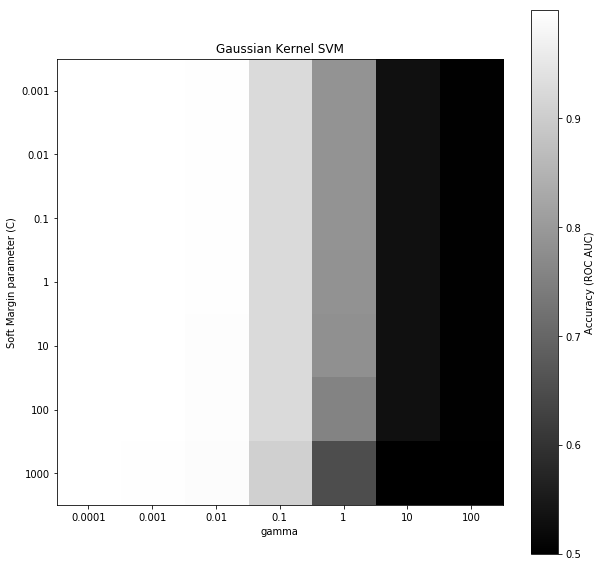

In [25]:
plt.figure(figsize=(10, 10))
im = plt.imshow(gaussian_scores, interpolation='nearest', origin= 'lower', cmap='gray')
plt.xlabel('gamma')
plt.ylabel('Soft Margin parameter (C)')
bar = plt.colorbar(im)
bar.set_label('Accuracy (ROC AUC)')
plt.xticks(np.arange(7), [0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
plt.yticks(np.arange(7), [1000, 100, 10, 1, 0.1, 0.01, 0.001])
plt.title('Gaussian Kernel SVM')

$\bullet$ The above heat map shows relation of accuracy, $\gamma$ and soft margin parameter ($\mathbf{c}$) for Gaussian Kernel.

**Ploting heat map for Polynomial Kernel**

Text(0.5,1,'Polynomial Kernel SVM')

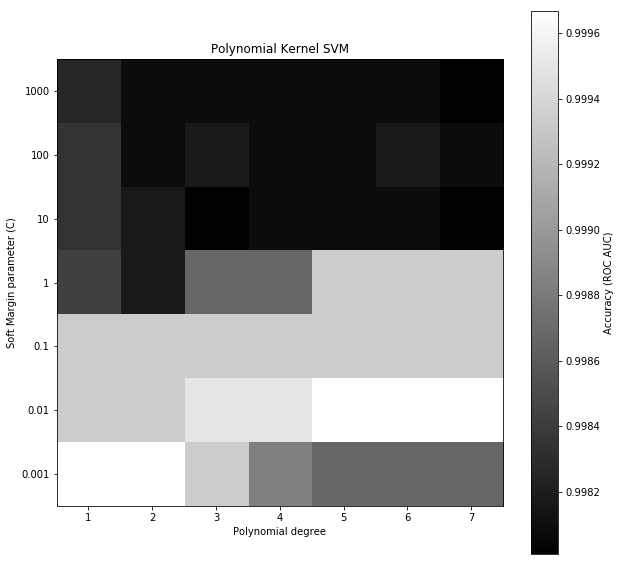

In [26]:
plt.figure(figsize=(10, 10))
im = plt.imshow(polynomial_scores, interpolation='nearest', cmap='gray')
plt.xlabel('Polynomial degree')
plt.ylabel('Soft Margin parameter (C)')
bar = plt.colorbar(im)
bar.set_label('Accuracy (ROC AUC)')
plt.xticks(np.arange(7), [1,2,3,4,5,6,7])
plt.yticks(np.arange(7), [1000, 100, 10, 1, 0.1, 0.01, 0.001])
plt.title('Polynomial Kernel SVM')

$\bullet$ The above heat map shows relation of accuracy, polynomial degree and soft margin parameter ($\mathbf{c}$) for Polynomial Kernel.

**Accuracy plots of Gaussian and Polynomial Kernels against Gamma and Soft Margin parameter (C)**

Text(0.5,1,'Cross Section of ROC curve for\n Polynomial Kernel SVM for degree=4')

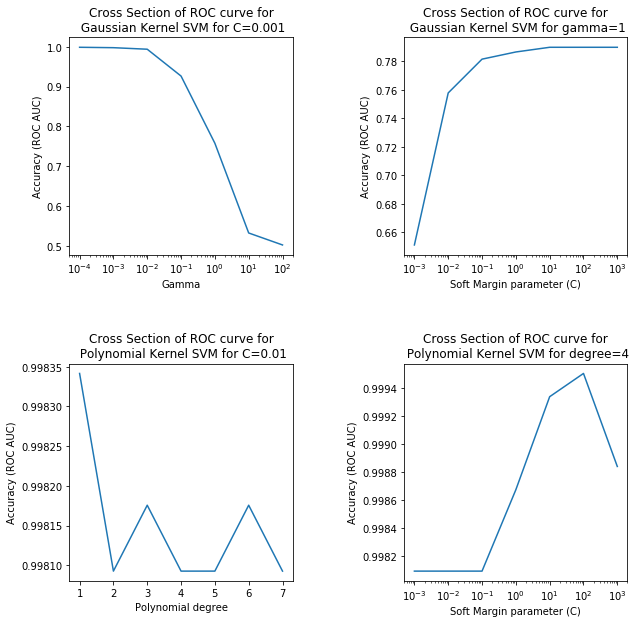

In [27]:
f, ((x1, x2), (x3, x4)) = plt.subplots(2, 2, figsize=(10, 10))
f.subplots_adjust(wspace=0.5, hspace=0.5)

#Gaussian Kernel
x1.semilogx([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], gaussian_scores[1,],  basex=10)
x1.set_xlabel('Gamma')
x1.set_ylabel('Accuracy (ROC AUC)')
x1.set_title('Cross Section of ROC curve for\n Gaussian Kernel SVM for C=0.001')

x2.semilogx([0.001, 0.01, 0.1, 1, 10, 100, 1000], gaussian_scores[:,4],  basex=10)
x2.set_xlabel('Soft Margin parameter (C)')
x2.set_ylabel('Accuracy (ROC AUC)')
x2.set_title('Cross Section of ROC curve for\n Gaussian Kernel SVM for gamma=1')

#Polynomial Kernel
x3.plot([1,2,3,4,5,6,7], polynomial_scores[1,])
x3.set_xlabel('Polynomial degree')
x3.set_ylabel('Accuracy (ROC AUC)')
x3.set_title('Cross Section of ROC curve for\n Polynomial Kernel SVM for C=0.01')


x4.semilogx([0.001, 0.01, 0.1, 1, 10, 100, 1000], polynomial_scores[:, 3],  basex=10)
x4.set_xlabel('Soft Margin parameter (C)')
x4.set_ylabel('Accuracy (ROC AUC)')
x4.set_title('Cross Section of ROC curve for\n Polynomial Kernel SVM for degree=4')

**Gaussian Kernel: $\gamma$ vs Accuracy, constant $\mathbf{c} = 0.001$**

The accuracy seems to decrease with increasing $\gamma$. The starting accuracy is  about  the  same  for  all  the  values  of  $\mathbf{c}$,  with  max  accuracy about 0.998. The accuracy reaches to a minimum value which is about 0.5 at $\gamma = 10$ and remains constant there after.


**Gaussian Kernel: soft margin paratmeter ($\mathbf{c}$) vs Accuracy, constant $\gamma = 1$**

The accuracy is highest about 0.80 and remains almost constant for large values of soft margin parameter ($\mathbf{c}$). As soft margin parameter ($\mathbf{c}$) increases the accuracy starts increasing and after a certain point in this case $\mathbf{c} =  10$ it reaches its threshold maximum value and stays there even if we increase $\mathbf{c}$.


**Polynomial Kernel: degree vs Accuracy, constant soft margin paratmeter ($\mathbf{c}) = 0.01$**

The accuracy of polynomial kernel is highest about 0.99835 for polynomial degree = 1, but it decreases as we increase the degree. It is observed that there are two peaks at degree 3 and 6 but the accuracy is still less when compared to accuracy at degree = 1.

**Polynomial Kernel: soft margin paratmeter ($\mathbf{c}$) vs Accuracy, constant degree = 4**

The accuracy of polynomial kernel increases with increase in soft margin paratmeter($\mathbf{c}$) and reaches its peak of about 0.9996 at $\mathbf{c}=100$, but then starts reducing as soft margin paratmeter ($\mathbf{c}$) becomes larger.

**Comparing the results using cross vaidation**

In [29]:
#Normalization
X_norm=preprocessing.normalize(X, norm='l2')

#Gaussian kernel
param_grid = [{'C': [100, 10, 1, 0.1, 0.01], 'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}]
classifier = GridSearchCV(svm.SVC(), param_grid, cv=cv_generator)

#raw data
cv_results_nested = cross_validate(classifier, X, Y, cv=cv_generator, scoring=('roc_auc'))
gaussian_raw=np.mean(cv_results_nested['test_score'])

#normalized data
cv_results_nested = cross_validate(classifier, X_norm, Y, cv=cv_generator, scoring=('roc_auc'))
gaussian_normalized=np.mean(cv_results_nested['test_score'])


#Linear kernel
param_grid = [{'C': [100, 10, 1, 0.1, 0.01], 'kernel': ['linear']}]
classifier = GridSearchCV(svm.SVC(), param_grid, cv=cv_generator)

#raw data
cv_results_nested = cross_validate(classifier, X, Y, cv=cv_generator, scoring=('roc_auc'))
linear_raw=np.mean(cv_results_nested['test_score'])

#normalized data
cv_results_nested = cross_validate(classifier, X_norm, Y, cv=cv_generator, scoring=('roc_auc'))
linear_normalized=np.mean(cv_results_nested['test_score'])


#Regularized Logistic Regression
classifier = LogisticRegressionCV(random_state=0, solver='lbfgs', multi_class='multinomial', Cs = [100, 10, 1, 0.1, 0.01], cv=cv_generator)

#raw data
cv_results_nested = cross_validate(classifier, X, Y, cv=cv_generator, scoring=('roc_auc'))
logistic_raw=np.mean(cv_results_nested['test_score'])

#normalized data
cv_results_nested = cross_validate(classifier, X_norm, Y, cv=cv_generator, scoring=('roc_auc'))
logistic_normalized=np.mean(cv_results_nested['test_score'])

**Creating Comparison Table**

In [30]:
rows = ['Raw data', 'Normalized data']
Gaussian = pd.Series([gaussian_raw, gaussian_normalized],index=rows)
Linear = pd.Series([linear_raw, linear_normalized],index=rows) 
Regularized_Logistic_Regression = pd.Series([logistic_raw, logistic_normalized],index=rows)
table = {'Gaussian SVM' : Gaussian,'Linear SVM' : Linear,'Regularized Logistic Regression' : Regularized_Logistic_Regression}
table = pd.DataFrame(table)
table

,Gaussian SVM,Linear SVM,Regularized Logistic Regression
Raw data,0.997373,0.998851,0.998030
Normalized data,0.998522,0.998522,0.998522


$\bullet$ Data is normalized using preprocessing.normalize(X_norm =  ’l2’) function. Grid search is used to find the best parameters for both raw data and normalised data. These parameters are used to find the classifier with the respective training data and that classifier is used to find the mean accuracy’s by using the cross validation fold 5 with respective test data.

$\bullet$ The table above shows the accurarcy of raw data and normalized data for linear SVM, Gaussian SVM and regularized logistic regression. And it can be seen that the Gaussian kernel performs very similar to linear SVM as well as logistic regression. 

$\bullet$ The mean accurarcy of linear SVM is a little higher than logistic  regression which performs a little better than the Gaussian SVM. This is because we have more number of features and less samples, due to which linear kernel performs better than gaussian.  

$\bullet$ Also, it can been seen that the accuracy of normalized data is slightly better than the accuracy of raw data. This is because there is a slight overfitting observed in raw data which causes a small decrease in the accuracy.

**Loading the breast cancer dataset from sklearn and standardizing it**

In [31]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
P = data.data
q = data.target

**Comparing the results using cross vaidation**

In [35]:
# Gaussian kernel
param_grid = [{'C': [100, 10, 1, 0.1, 0.01], 'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}]
classifier = GridSearchCV(svm.SVC(), param_grid, cv =cv_generator)

# raw data
cv_results_nested = cross_validate(classifier, P, q, cv=cv_generator, scoring=('roc_auc'))
gaussian_raw=np.mean(cv_results_nested['test_score'])

# standardized data
scaler = preprocessing.StandardScaler().fit(P)
A = scaler.transform(P)
cv_results_nested = cross_validate(classifier, A, q, cv=cv_generator, scoring=('roc_auc', 'accuracy'), return_train_score=False)
gaussian_std=np.mean(cv_results_nested['test_accuracy'])


# Linear kernel
param_grid = [{'C': [100, 10, 1, 0.1, 0.01], 'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}]
classifier = GridSearchCV(svm.SVC(),  param_grid, cv =cv_generator)

# raw data
cv_results_nested = cross_validate(classifier, P, q, cv=cv_generator, scoring=('roc_auc'))
linear_raw=np.mean(cv_results_nested['test_score'])

# standardized data
scaler = preprocessing.StandardScaler().fit(P)
A = scaler.transform(P)
cv_results_nested = cross_validate(classifier, A, q, cv=cv_generator, scoring=('roc_auc', 'accuracy'), return_train_score=False)
linear_std=np.mean(cv_results_nested['test_accuracy'])


# Logistic regression
classifier = LogisticRegressionCV(random_state=0, solver='lbfgs', multi_class='multinomial', Cs = [100, 10, 1, 0.1, 0.01], cv=cv_generator)

#raw data
cv_results_nested = cross_validate(classifier, P, q, cv=cv_generator, scoring=('roc_auc', 'accuracy'), return_train_score=False)
logistic_raw=np.mean(cv_results_nested['test_accuracy'])

#standardized data
scaler = preprocessing.StandardScaler().fit(P)
A = scaler.transform(P)
cv_results_nested = cross_validate(classifier, A, q, cv=cv_generator, scoring=('roc_auc', 'accuracy'), return_train_score=False)
logistic_std=np.mean(cv_results_nested['test_accuracy'])

**Creating Comparison Table**

In [36]:
rows = ['Raw data', 'Standardized data']
Gaussian_SVM = pd.Series([gaussian_raw, gaussian_std],index=rows)
Linear_SVM = pd.Series([linear_raw, linear_std],index=rows) 
Logistic_Regression = pd.Series([logistic_raw, logistic_std],index=rows) 

table = {'Gaussian SVM' : Gaussian_SVM,'Linear SVM' : Linear_SVM, 'Logistic Regression' : Logistic_Regression} 
table = pd.DataFrame(table) 
table

,Gaussian SVM,Linear SVM,Logistic Regression
Raw data,0.943179,0.989250,0.947303
Standardized data,0.980654,0.971897,0.964879


$\bullet$ To get a better understanding, I selected breast cancer data set from sklearn and did a similar comaprison using nested cross validation and analysed that the accurarcy for standardized data and raw data and observed an improvement in the accuracy when we standardized the data as seen in the table above. Hence, we can say that normalization or standardization gives us better accurarcy in most cases as it minimizes overfitting. 

**Visualizing kernel on raw data**

Text(0.5,1,'Kernel Matrix for raw data')

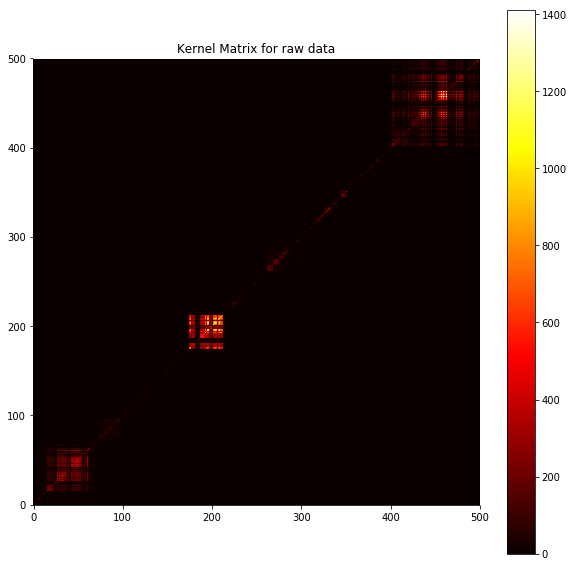

In [88]:
Kernel = np.dot(X, X.T)
Kernel = Kernel.todense()

plt.figure(figsize=(10, 10))
plt.imshow(Kernel, cmap= 'hot', origin = 'lower')
plt.colorbar()
plt.title('Kernel Matrix for raw data')


**Visualizing kernel on normalized data**

Text(0.5,1,'Kernel Matrix for normalized data')

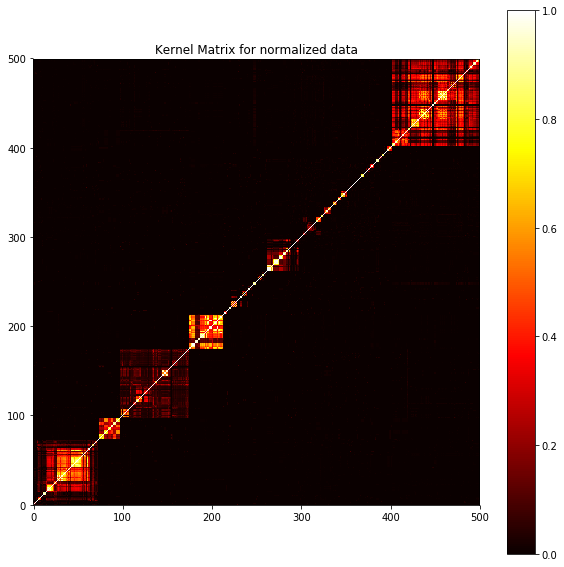

In [90]:
K = np.dot(X_norm, X_norm.T)
K = K.todense()

plt.figure(figsize=(10, 10))
plt.imshow(K, cmap= 'hot', origin = 'lower')
plt.colorbar()
plt.title('Kernel Matrix for normalized data')

$\bullet$ Lastly, we visualize the kernel matrix associated with the dataset and it can be seen from graph that most of the data is sparse, i.e. there are large number zero and small values along the boundary.

### Your Report

Answer the questions in the cells reserved for that purpose.

Mathematical equations should be written as LaTex equations; the assignment contains multiple examples of both inline formulas (such as the one exemplifying the notation for the norm of a vector $||\mathbf{x}||$ and those that appear on separate lines, e.g.:

$$
||\mathbf{x}|| = \sqrt{\mathbf{x}^T \mathbf{x}}.
$$



### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots and results in your notebook.


### Grading 

Here is what the grade sheet will look like for this assignment.  A few general guidelines for this and future assignments in the course:

  * Your answers should be concise and to the point.  We will take off points if that is not the case.
  * Always provide a description of the method you used to produce a given result in sufficient detail such that the reader can reproduce your results on the basis of the description.  You can use a few lines of python code or pseudo-code.


Grading sheet for the assignment:

```
Part 1:  40 points.
( 5 points):  Primal SVM formulation is correct
(10 points):  Lagrangian found correctly
(10 points):  Derivation of saddle point equations
(15 points):  Derivation of the dual

Part 2:  20 points.

Part 3:  40 points.
(20 points):  Accuracy as a function of parameters and discussion of the results
(15 points):  Comparison of normalized and non-normalized kernels and correct model selection
( 5 points):  Visualization of the kernel matrix and observations made about it
```

Grading will be based on the following criteria:

  * Correctness of answers to math problems
  * Math is formatted as LaTex equations
  * Correct behavior of the required code
  * Easy to understand plots 
  * Overall readability and organization of the notebook
  * Effort in making interesting observations where requested.
  * Conciseness.  Points may be taken off if the notebook is overly 
  